X_train shape: (2366, 42)
y_train shape: (9460, 2)
X_test shape: (2366, 42)

訓練資料的基本資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           2366 non-null   float64
 1   鄉鎮市區         2366 non-null   object 
 2   交易標的         2366 non-null   object 
 3   路名           2366 non-null   object 
 4   土地移轉總面積平方公尺  2366 non-null   float64
 5   都市土地使用分區     2366 non-null   object 
 6   土地數          2366 non-null   float64
 7   建物數          2366 non-null   float64
 8   車位數          2366 non-null   float64
 9   移轉層次         2366 non-null   float64
 10  移轉層次項目       2366 non-null   object 
 11  總樓層數         2366 non-null   float64
 12  建物型態         2366 non-null   object 
 13  主要用途         2366 non-null   object 
 14  主要建材         2366 non-null   object 
 15  建築完成年月       2366 non-null   object 
 16  建物移轉總面積平方公尺  2366 non-null   float64
 17  建物

/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-5

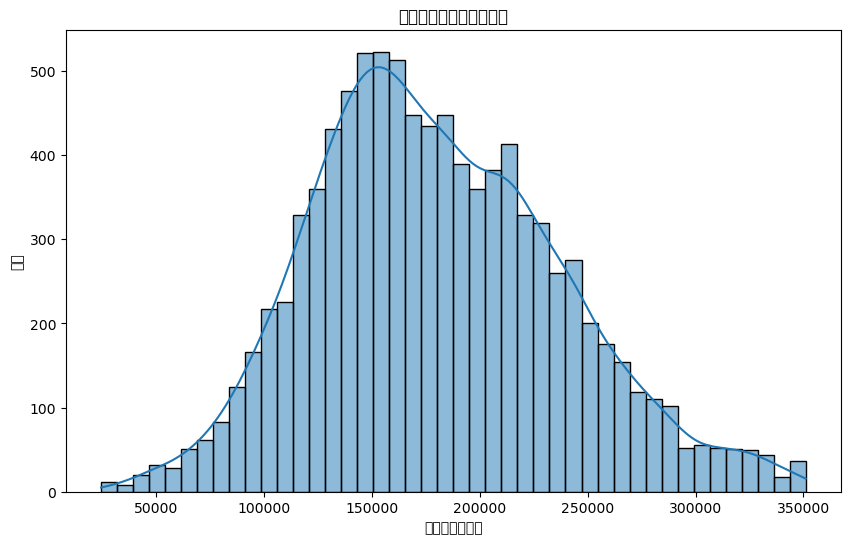


訓練資料統計摘要：
                Id  土地移轉總面積平方公尺          土地數          建物數          車位數  \
count  2366.000000  2366.000000  2366.000000  2366.000000  2366.000000   
mean   1182.500000    30.237967     1.355030     1.027895     0.452663   
std     683.149691    17.780348     0.886777     0.203727     0.693125   
min       0.000000     1.610000     1.000000     1.000000     0.000000   
25%     591.250000    19.392500     1.000000     1.000000     0.000000   
50%    1182.500000    27.635000     1.000000     1.000000     0.000000   
75%    1773.750000    37.375000     1.000000     1.000000     1.000000   
max    2365.000000   193.760000    14.000000     5.000000     8.000000   

              移轉層次         總樓層數  建物移轉總面積平方公尺     建物現況格局-房     建物現況格局-廳  ...  \
count  2366.000000  2366.000000  2366.000000  2366.000000  2366.000000  ...   
mean      4.691040     8.493238   129.631365     2.598901     1.675824  ...   
std       3.270287     4.574005    72.585679     1.175572     0.635243  ...   
min   

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
X_train = pd.read_csv('/Users/wudongyan/Desktop/mini-project/X_test.csv')
y_train = pd.read_csv('/Users/wudongyan/Desktop/mini-project/y_train.csv')
X_test = pd.read_csv('/Users/wudongyan/Desktop/mini-project/X_test.csv')

# 檢查資料的維度
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

# 合併 X_train 和 y_train 方便分析
train_data = pd.concat([X_train, y_train['單價元平方公尺']], axis=1)

# 檢查資料的基本資訊
print("\n訓練資料的基本資訊：")
print(train_data.info())
print("\n測試資料的基本資訊：")
print(X_test.info())

# 檢查資料是否有缺失值
print("\n訓練資料缺失值檢查：")
print(train_data.isnull().sum())
print("\n測試資料缺失值檢查：")
print(X_test.isnull().sum())

# 觀察目標變數的分佈
plt.figure(figsize=(10, 6))
sns.histplot(train_data['單價元平方公尺'], kde=True)
plt.title("房價單價元平方公尺分佈")
plt.xlabel("單價元平方公尺")
plt.ylabel("頻率")
plt.show()

# 檢查特徵的統計摘要
print("\n訓練資料統計摘要：")
print(train_data.describe())

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# 讀取資料


# 檢查 y_train 的欄位名稱
print("y_train columns:", y_train.columns)
print("X_train columns:", X_train.columns)

# 確保 y_train 欄位名稱正確
if '單價元平方公尺' not in y_train.columns:
    y_train.rename(columns={y_train.columns[1]: '單價元平方公尺'}, inplace=True)

# 確認 Id 是否為整數型資料，若不是則轉換
y_train['Id'] = y_train['Id'].astype(int)
X_train['Id'] = X_train['Id'].astype(int)

# 使用 Id 進行合併，確保資料對應正確
train_data = pd.merge(X_train, y_train, on='Id', how='inner')

# 檢查合併後的資料框是否包含目標變數
print("train_data columns after merge:", train_data.columns)

# 確保目標變數 '單價元平方公尺' 為數值型
train_data['單價元平方公尺'] = pd.to_numeric(train_data['單價元平方公尺'], errors='coerce')

# 檢查資料型別
print("Data types after conversion:")
print(train_data.dtypes)

# 處理缺失值：刪除包含大量缺失值的欄位
train_data.drop(columns=['Id'], inplace=True)

# 準備特徵與目標變數
X = train_data.drop(columns=['單價元平方公尺'])
y = train_data['單價元平方公尺']

# 確認目標變數沒有缺失值
print("Missing values in target variable:", y.isnull().sum())

# 切分資料集為訓練集與驗證集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 處理數值型缺失值：使用中位數填補
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 處理類別型變數：使用 One-Hot Encoding
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 建立 Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 預處理資料
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# 檢查資料處理結果
print("X_train_processed shape:", X_train_processed.shape)
print("X_val_processed shape:", X_val_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)

y_train columns: Index(['Id', '單價元平方公尺'], dtype='object')
X_train columns: Index(['Id', '鄉鎮市區', '交易標的', '路名', '土地移轉總面積平方公尺', '都市土地使用分區', '土地數', '建物數',
       '車位數', '移轉層次', '移轉層次項目', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月',
       '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間',
       '有無管理組織', '交易年', '交易日', '交易月', '地鐵站', '超商', '公園', '托兒所', '國小', '國中',
       '高中職', '大學', '金融機構', '醫院', '大賣場', '超市', '百貨公司', '警察局', '消防局', '縱坐標',
       '橫坐標'],
      dtype='object')
train_data columns after merge: Index(['Id', '鄉鎮市區', '交易標的', '路名', '土地移轉總面積平方公尺', '都市土地使用分區', '土地數', '建物數',
       '車位數', '移轉層次', '移轉層次項目', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月',
       '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間',
       '有無管理組織', '交易年', '交易日', '交易月', '地鐵站', '超商', '公園', '托兒所', '國小', '國中',
       '高中職', '大學', '金融機構', '醫院', '大賣場', '超市', '百貨公司', '警察局', '消防局', '縱坐標',
       '橫坐標', '單價元平方公尺'],
      dtype='object')
Data types after conversion:
Id               int64
鄉鎮市區      

基礎模型：線性迴歸

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 建立線性迴歸模型
model = LinearRegression()
model.fit(X_train_processed, y_train)

# 預測驗證集
y_val_pred = model.predict(X_val_processed)

# 計算 RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse:.2f}")

# 預測測試集
y_test_pred = model.predict(X_test_processed)

# 生成提交檔案
submission = pd.DataFrame({
    'Id': X_test['Id'],
    '單價元平方公尺': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print("提交檔案已生成：submission.csv")

Validation RMSE: 97862.93
提交檔案已生成：submission.csv


Ridge 和 Lasso 模型

In [54]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_processed, y_train)
y_val_pred_ridge = ridge_model.predict(X_val_processed)
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
print(f"Ridge Regression Validation RMSE: {rmse_ridge:.2f}")

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_processed, y_train)
y_val_pred_lasso = lasso_model.predict(X_val_processed)
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
print(f"Lasso Regression Validation RMSE: {rmse_lasso:.2f}")

# 預測測試集 (選擇 RMSE 較低的模型)
if rmse_ridge < rmse_lasso:
    best_model = ridge_model
    model_name = "Ridge"
else:
    best_model = lasso_model
    model_name = "Lasso"

y_test_pred = best_model.predict(X_test_processed)

# 生成提交檔案
submission = pd.DataFrame({
    'Id': X_test['Id'],
    '單價元平方公尺': y_test_pred
})
submission.to_csv(f'submission_{model_name}.csv', index=False)
print(f"提交檔案已生成：submission_{model_name}.csv")

Ridge Regression Validation RMSE: 61771.11
Lasso Regression Validation RMSE: 92297.77
提交檔案已生成：submission_Ridge.csv


/Users/wudongyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480953764325.4217, tolerance: 622198544.0936192
  model = cd_fast.sparse_enet_coordinate_descent(


隨機森林回歸模型

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 建立隨機森林回歸模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# 預測驗證集
y_val_pred_rf = rf_model.predict(X_val_processed)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
print(f"Random Forest Validation RMSE: {rmse_rf:.2f}")

# 預測測試集
y_test_pred_rf = rf_model.predict(X_test_processed)

# 生成提交檔案
submission_rf = pd.DataFrame({
    'Id': X_test['Id'],
    '單價元平方公尺': y_test_pred_rf
})
submission_rf.to_csv('submission_RandomForest.csv', index=False)
print("提交檔案已生成：submission_RandomForest.csv")

Random Forest Validation RMSE: 59085.03
提交檔案已生成：submission_RandomForest.csv


進一步的隨機森林優化程式碼示範

如果你想繼續調整隨機森林模型，以下程式碼將使用 RandomizedSearchCV 來自動調整超參數：

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 設定超參數搜索範圍
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 初始化隨機森林模型
rf_model = RandomForestRegressor(random_state=42)

# 使用 RandomizedSearchCV 進行超參數調整
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train_processed, y_train)

# 最佳超參數
print("Best Parameters:", rf_random.best_params_)

# 使用最佳模型進行驗證集預測
best_rf_model = rf_random.best_estimator_
y_val_pred_best_rf = best_rf_model.predict(X_val_processed)
rmse_best_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_best_rf))
print(f"Tuned Random Forest Validation RMSE: {rmse_best_rf:.2f}")

# 預測測試集
y_test_pred_best_rf = best_rf_model.predict(X_test_processed)

# 生成提交檔案
submission_best_rf = pd.DataFrame({
    'Id': X_test['Id'],
    '單價元平方公尺': y_test_pred_best_rf
})
submission_best_rf.to_csv('submission_TunedRandomForest.csv', index=False)
print("提交檔案已生成：submission_TunedRandomForest.csv")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; tota

特徵重要性分析程式碼（可選）

In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# 自定義 RMSE 評估指標
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# 初始化 XGBRegressor 模型（已移除 early_stopping_rounds）
xgb_model = XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=2,
    random_state=42,
    objective='reg:squarederror'
)

# 設置 K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 執行 K-Fold Cross-Validation 並計算 RMSE
cv_scores = cross_val_score(xgb_model, X_train_processed, y_train, 
                            scoring=rmse_scorer, cv=kf, n_jobs=-1)

# 輸出 K-Fold Cross-Validation 的 RMSE 結果
print(f"K-Fold Cross-Validation RMSE Scores: {-cv_scores}")
print(f"Average RMSE: {-np.mean(cv_scores):.2f}")

K-Fold Cross-Validation RMSE Scores: [60188.35380293 62050.46325895 62345.97494234 63162.51055498
 62012.6662554 ]
Average RMSE: 61951.99


/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31689 (\N{CJK UNIFIED IDEOGRAPH-7BC9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wudongyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5

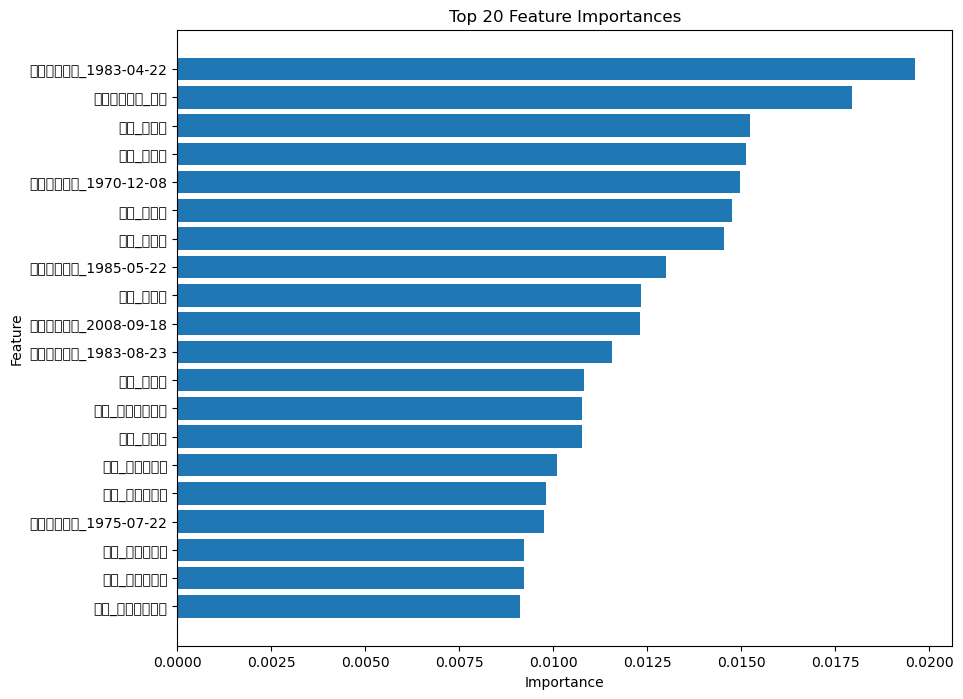

                Feature  Importance
1131  建築完成年月_1983-04-22    0.019631
502           移轉層次項目_騎樓    0.017953
332              路名_玉成街    0.015231
164              路名_寶興街    0.015131
670   建築完成年月_1970-12-08    0.014970
273              路名_東明街    0.014751
258              路名_景興路    0.014544
1234  建築完成年月_1985-05-22    0.012995
126              路名_四平街    0.012335
1763  建築完成年月_2008-09-18    0.012299
1146  建築完成年月_1983-08-23    0.011565
168              路名_崗山路    0.010807
121           路名_和平西路三段    0.010755
460              路名_青年路    0.010751
204            路名_忠誠路二段    0.010086
211            路名_成功路二段    0.009803
844   建築完成年月_1975-07-22    0.009760
313            路名_汀州路三段    0.009225
91             路名_八德路三段    0.009220
306           路名_民生東路四段    0.009126


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# 確保模型已經在整個訓練集上訓練
xgb_model = XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=2,
    random_state=42,
    objective='reg:squarederror'
)
xgb_model.fit(X_train_processed, y_train)

# 獲取處理後的特徵名稱
def get_feature_names(preprocessor):
    """
    獲取 ColumnTransformer 處理後的特徵名稱
    """
    output_features = []
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            output_features.extend(transformer.get_feature_names_out(columns))
        else:
            output_features.extend(columns)
    return output_features

# 獲取經過處理後的特徵名稱
processed_feature_names = get_feature_names(preprocessor)

# 確保 importances 和 processed_feature_names 長度一致
importances = xgb_model.feature_importances_

# 檢查長度是否一致
if len(importances) != len(processed_feature_names):
    print("特徵數量不一致，請檢查！")
else:
    # 創建 DataFrame
    importance_df = pd.DataFrame({
        'Feature': processed_feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # 視覺化 Top 20 特徵
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Top 20 Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()

    # 輸出前 20 個重要特徵
    print(importance_df.head(20))

In [59]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train = pd.read_csv('/Users/wudongyan/Desktop/mini-project/X_test.csv')
y_train = pd.read_csv('/Users/wudongyan/Desktop/mini-project/y_train.csv')
X_test = pd.read_csv('/Users/wudongyan/Desktop/mini-project/X_test.csv')
# 檢查欄位是否存在
if '建築完成年月' in X_train.columns:
    # 計算房齡特徵
    X_train['房齡'] = 2024 - pd.to_datetime(X_train['建築完成年月'], errors='coerce').dt.year
    X_test['房齡'] = 2024 - pd.to_datetime(X_test['建築完成年月'], errors='coerce').dt.year

    # 移除原本的 "建築完成年月" 欄位
    X_train.drop(columns=['建築完成年月'], inplace=True)
    X_test.drop(columns=['建築完成年月'], inplace=True)
else:
    print("欄位 '建築完成年月' 不存在於資料集中，無法計算房齡。")

# 進行 One-Hot Encoding 前的資料處理
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

categorical_features = ['鄉鎮市區', '交易標的', '路名', '都市土地使用分區', '移轉層次項目', '建物型態', '主要用途', '主要建材', '有無管理組織']
numerical_features = ['土地移轉總面積平方公尺', '土地數', '建物數', '車位數', '移轉層次', '總樓層數', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '交易年', '交易月', '地鐵站', '超商', '公園', '托兒所', '國小', '國中', '高中職', '大學', '金融機構', '醫院', '大賣場', '超市', '百貨公司', '警察局', '消防局', '縱坐標', '橫坐標', '房齡']

# 建立資料前處理流程
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 進行資料處理
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 重新訓練 XGBoost 模型
xgb_model = XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=2,
    random_state=42,
    objective='reg:squarederror'
)
xgb_model.fit(X_train_processed, y_train)

# 預測並計算 RMSE
y_pred = xgb_model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train_processed)))
print(f"Train RMSE: {rmse:.2f}")

# 生成提交檔案
submission = pd.DataFrame({'Id': X_test['Id'], '單價元平方公尺': y_pred})
submission.to_csv('submission_optimized.csv', index=False)
print("提交檔案已生成：submission_optimized.csv")

XGBoostError: [14:28:45] /Users/runner/work/xgboost/xgboost/src/data/data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (2358 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000032b438454 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000032b596384 xgboost::MetaInfo::SetInfoFromHost(xgboost::Context const&, xgboost::StringView, xgboost::Json) + 2532
  [bt] (2) 3   libxgboost.dylib                    0x000000032b595814 xgboost::MetaInfo::SetInfo(xgboost::Context const&, xgboost::StringView, xgboost::StringView) + 464
  [bt] (3) 4   libxgboost.dylib                    0x000000032b44fa8c XGDMatrixSetInfoFromInterface + 228
  [bt] (4) 5   libffi.8.dylib                      0x00000001031cc04c ffi_call_SYSV + 76
  [bt] (5) 6   libffi.8.dylib                      0x00000001031c9834 ffi_call_int + 1404
  [bt] (6) 7   _ctypes.cpython-311-darwin.so       0x00000001031ac150 _ctypes_callproc + 752
  [bt] (7) 8   _ctypes.cpython-311-darwin.so       0x00000001031a64b4 PyCFuncPtr_call + 228
  [bt] (8) 9   python3.11                          0x0000000102325034 _PyEval_EvalFrameDefault + 197300



X_train_processed shape: (2366, 557)
y_train shape: (9460, 2)
X_train_processed 和 y_train 的行數不一致！
